# Pymaceuticals Inc.
---

### Analysis

- Removing duplicates ID the total number of mice is 248. We can also see that 49% are female and 51% are male
- We can see that the correlation between mouse weight, and average tumor volume is 0.84. 
- When looking for outliers in the top 4 treatments, Infubinol was the only regimen that shows one.
- Beased in the data results it shows that Ramicane and Capomulin are the most effective treatments. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for i,x in enumerate(combined_data.duplicated(subset=['Mouse ID',"Timepoint"])):
    if x==True:
        print(combined_data.iloc[i,0:2])

Mouse ID     g989
Timepoint       0
Name: 137, dtype: object
Mouse ID     g989
Timepoint       5
Name: 360, dtype: object
Mouse ID     g989
Timepoint      10
Name: 681, dtype: object
Mouse ID     g989
Timepoint      15
Name: 869, dtype: object
Mouse ID     g989
Timepoint      20
Name: 1111, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean=combined_data[combined_data["Mouse ID"] != 'g989']
mouse_metadata_clean=mouse_metadata[mouse_metadata["Mouse ID"] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data=combined_data_clean["Mouse ID"].value_counts()
clean_number_of_mice=len(mouse_metadata_clean)
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Grp=combined_data_clean.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary=Summary_Grp["Tumor Volume (mm3)"].mean().reset_index(name="Mean Tumor Volume")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].median().reset_index(name="Median Tumor Volume"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].var().reset_index(name="Tumor Volume Variance"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].std().reset_index(name="Tumor Volume Std. Deviation"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].sem().reset_index(name="Tumor Volume SEM"),on="Drug Regimen",how="left")

Summary



,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary2=combined_data_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line.
Summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

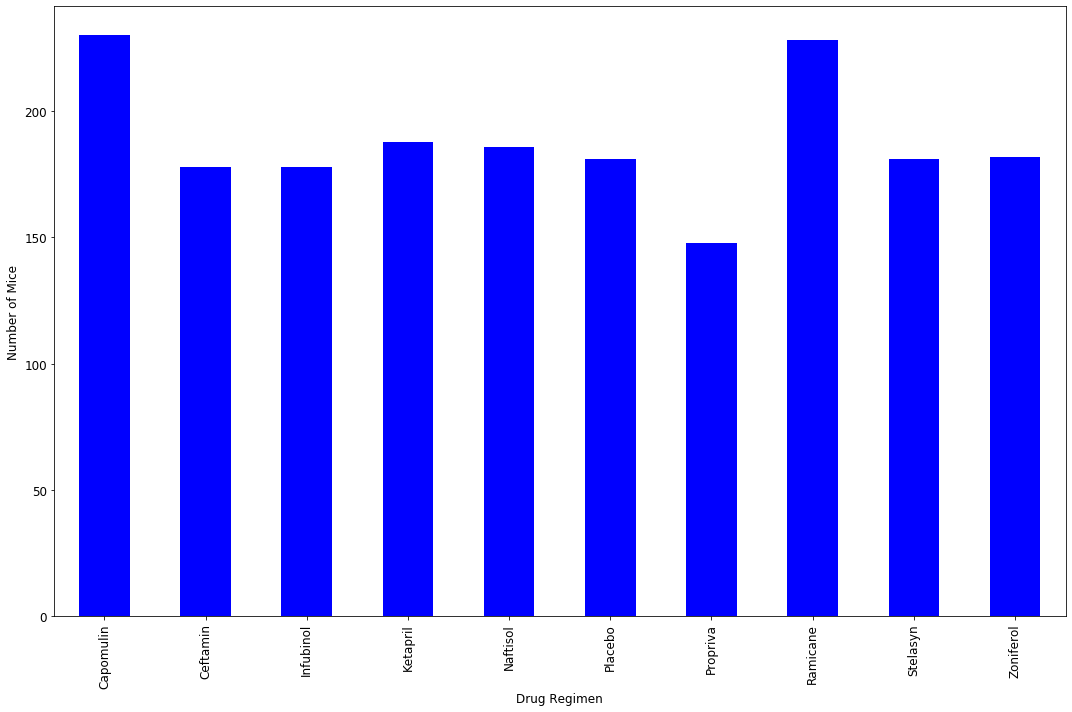

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_mice_tested = combined_data_clean.groupby(["Drug Regimen"]).count()["Mouse ID"] 
plot_pandas = count_mice_tested.plot.bar(figsize=(15,10), color='b',fontsize = 12)
count_mice_tested
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)

plt.savefig("../Images/Pan_mice_tested_per_regimen.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

count_mice_tested

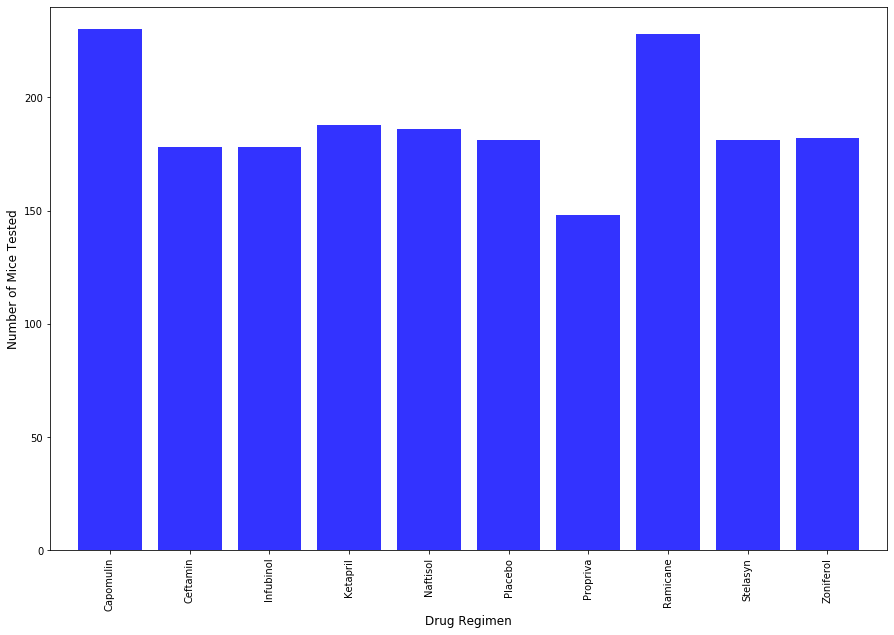

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_tested_list =(combined_data_clean.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_tested_list

x_axis = np.arange(len(mice_tested_list))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_tested_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_tested_list)+10)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice Tested",fontsize = 12)

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


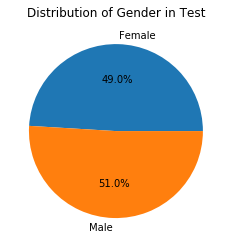

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_data_clean.groupby(["Sex"])["Mouse ID"].count().plot.pie(title="Distribution of Gender in Test",label="",autopct="%1.1f%%")


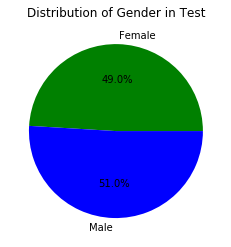

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piePlot=combined_data_clean.groupby(["Sex"])["Mouse ID"].count().reset_index(name="Count of Mouse ID")
labs = piePlot["Sex"]
Count = piePlot["Count of Mouse ID"]
colors = ["green","blue"]
plt.pie(Count, labels=labs, colors=colors,autopct="%1.1f%%")
plt.title("Distribution of Gender in Test")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Top4=combined_data_clean.loc[(combined_data_clean["Drug Regimen"]=="Capomulin")|(combined_data_clean["Drug Regimen"]=="Ramicane")|(combined_data_clean["Drug Regimen"]=="Infubinol")|(combined_data_clean["Drug Regimen"]=="Ceftamin") ,:]
# Start by getting the last (greatest) timepoint for each mouse
Top4=Top4.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Top4=pd.merge(Top4,combined_data_clean[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
Top4


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(100):
    DR=Top4.iloc[i,:]["Drug Regimen"]
    Tum=Top4.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)
            continue

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]

for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = Top4.loc[Top4["Drug Regimen"]==Treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")

    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")

    # Print Potencial outliers
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
    for Tumor in Tumors[Num]:
        if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")

    

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median 

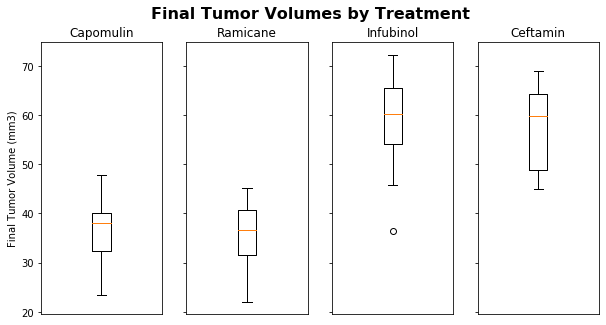

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(10,5))
fig.suptitle("Final Tumor Volumes by Treatment", fontsize=16, fontweight="bold")

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title(Treatments[0])
ax1.boxplot(Tumors[0])
ax1.set_xticks([])

ax2.set_title(Treatments[1])
ax2.boxplot(Tumors[1])
ax2.set_xticks([])

ax3.set_title(Treatments[2])
ax3.boxplot(Tumors[2])
ax3.set_xticks([])

ax4.set_title(Treatments[3])
ax4.boxplot(Tumors[3])
ax4.set_xticks([])

plt.show()

## Line and Scatter Plots

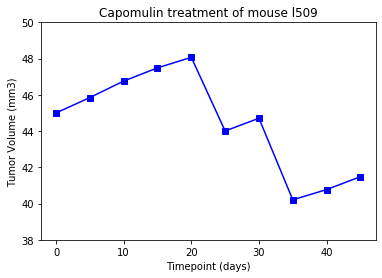

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Single_Mouse_Capomulin=combined_data_clean.loc[combined_data_clean["Mouse ID"]=='l509',:]
x_axis=Single_Mouse_Capomulin["Timepoint"].count()
plt.plot(Single_Mouse_Capomulin["Timepoint"],Single_Mouse_Capomulin["Tumor Volume (mm3)"],marker='s',color="b")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(38,50)
plt.show()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

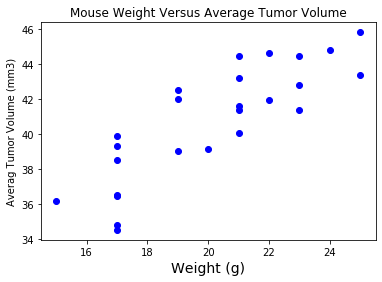

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = combined_data_clean.loc[combined_data_clean["Drug Regimen"] == "Capomulin",:]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_data_clean, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


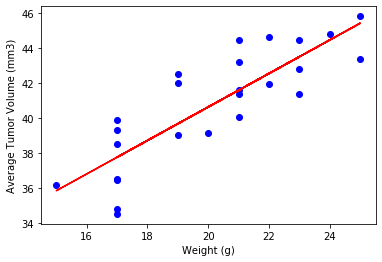

In [19]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()